In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from config_local import DATA_DIR, SEED

# Assess initial data sample
Data was collected with `get_text_v3`.

In [2]:
data = pd.read_csv(Path(DATA_DIR, "tests", "test_output_v3.csv"))
data = data.drop_duplicates(["id"])
data["id"] = data.id.astype("str")

print(f"Number of rows: {len(data)}")
data.head()


Number of rows: 1204


,id,url,title,retrieval_time,full_text,word_count
0,20221010214845,https://www.aljazeera.com/economy/2022/10/10/m...,Musk praised by Chinese diplomat over controve...,2024-03-21 16:08:22.474740,"“Taiwan sells many products, but our freedom a...",338.0
1,20221011065555,https://www.aljazeera.com/economy/2022/10/10/s...,Singtel unit faces cyberattack weeks after Opt...,2024-03-21 16:08:22.522040,"Singtel said on Monday the attack on Dialog, a...",140.0
2,20221011074457,https://www.aljazeera.com/economy/2022/10/10/u...,UAE president to meet Russia’s Vladimir Putin ...,2024-03-21 16:08:22.590116,United Arab Emirates President Sheikh Mohammed...,485.0
3,20221012062930,https://www.aljazeera.com/economy/2022/10/11/a...,Australia to avoid recession amid ‘dangerous’ ...,2024-03-21 16:08:22.672653,Australia should be able to avoid a recession ...,230.0
4,20221012064231,https://www.aljazeera.com/economy/2022/10/11/b...,Biden labour proposal could shake up gig economy,2024-03-21 16:08:22.724284,"Gig company stocks were hammered on the news, ...",562.0


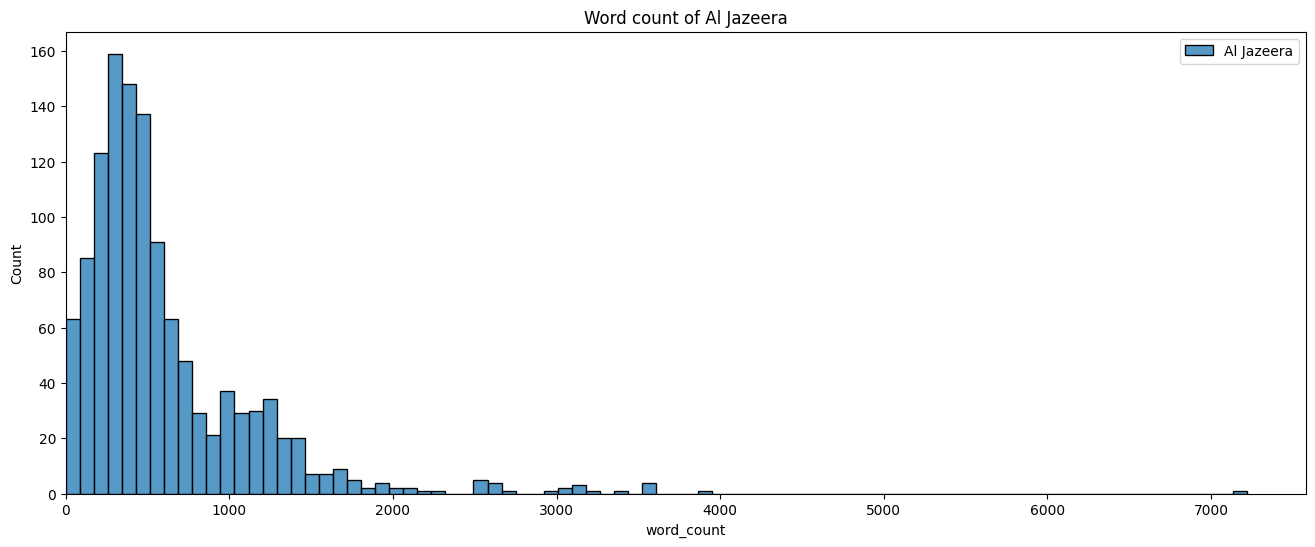

Share of articles with length zero: 	3.16%
Number of articles with length zero: 	38
Number of articles with full text: 	1166


In [3]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.histplot(data, x="word_count", label="Al Jazeera")
ax.set_xlim(left=0)
plt.title("Word count of Al Jazeera")
plt.legend()
plt.show()

print(f"Share of articles with length zero: \t{(data.word_count==0).mean():.2%}")
print(f"Number of articles with length zero: \t{(data.word_count==0).sum()}")
print(f"Number of articles with full text: \t{(data.word_count!=0).sum()}")

In [4]:
test_articles_zero = data.loc[data.word_count==0].sample(25, random_state=SEED)
test_articles_non_zero = data.loc[data.word_count!=0].sample(25, random_state=SEED)

aljazeera_test_articles = pd.concat([test_articles_zero, test_articles_non_zero])



# Assess new parsing methods
The test article were extracted again with `get_text_v4`.

In [5]:
aljazeera_test_articles_v2 = pd.read_csv(Path(DATA_DIR, "tests","test_output_v4.csv"))
aljazeera_test_articles_v2 = aljazeera_test_articles_v2.drop_duplicates(["id"])
aljazeera_test_articles_v2["id"] = aljazeera_test_articles_v2.id.astype("str")
aljazeera_test_articles_v2 = aljazeera_test_articles_v2.rename({"word_count": "word_count_v2"}, axis=1)

aljazeera_test_articles_full = pd.merge(aljazeera_test_articles, aljazeera_test_articles_v2[["id", "word_count_v2"]], how="left", on="id")
aljazeera_test_articles_full["word_count_diff"] = aljazeera_test_articles_full["word_count_v2"] - aljazeera_test_articles_full["word_count"]



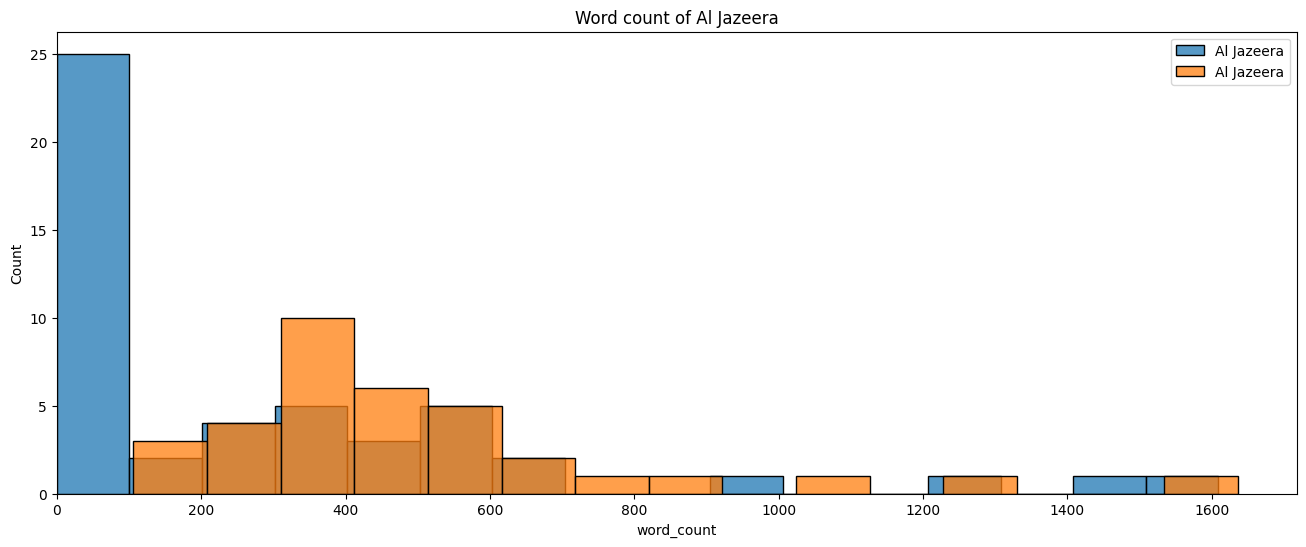

Mean word_count (v1): 	549.0
Mean word_count (v2): 	509.0


In [6]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.histplot(aljazeera_test_articles_full, x="word_count", binwidth=100, label="Al Jazeera")
sns.histplot(aljazeera_test_articles_full, x="word_count_v2", binwidth=100, label="Al Jazeera")
ax.set_xlim(left=0)
plt.title("Word count of Al Jazeera")
plt.legend()
plt.show()

print(f"Mean word_count (v1): \t{aljazeera_test_articles_full.loc[aljazeera_test_articles_full.word_count!=0].word_count.mean()}")
print(f"Mean word_count (v2): \t{aljazeera_test_articles_full.word_count_v2.mean()}")


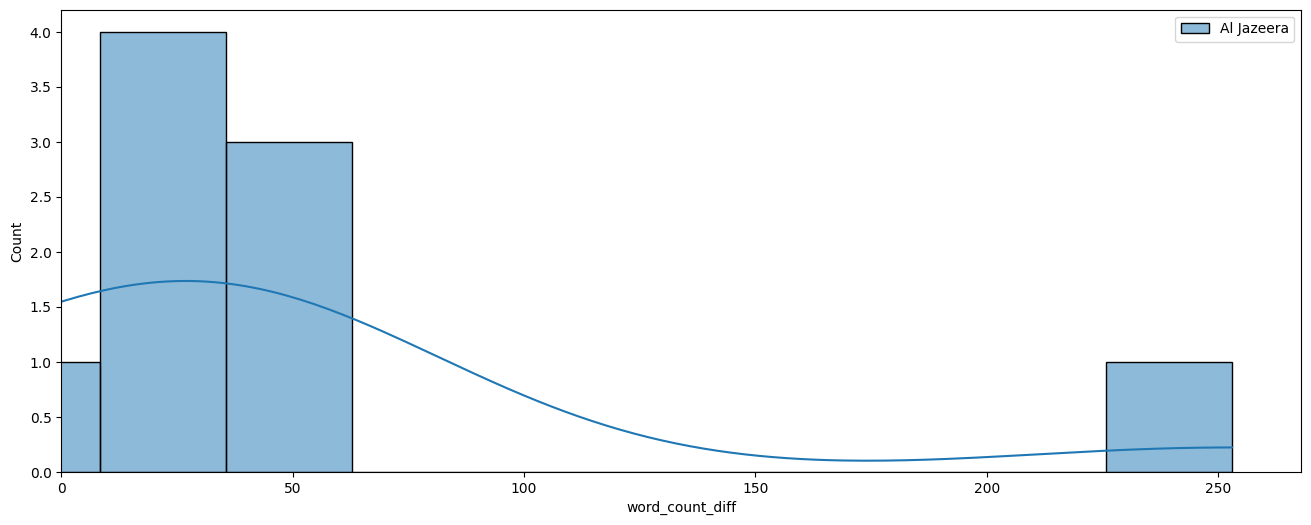

Mean word_count_diff: 	45.2


In [7]:
df = aljazeera_test_articles_full.loc[aljazeera_test_articles_full.word_count!=0]

fig, ax = plt.subplots(figsize=(16, 6))

sns.histplot(df, x="word_count_diff", label="Al Jazeera", kde=True)
ax.set_xlim(left=0)
plt.legend()
plt.show()

print(f"Mean word_count_diff: \t{df.word_count_diff.mean()}")


In [8]:
aljazeera_test_articles_v2.to_excel(Path(DATA_DIR, "tests", "aljazeera_test_articles_v2.xlsx"), index=False)


In [9]:
aljazeera_test_articles_random_sample = pd.read_csv(Path(DATA_DIR, "tests", "test_output_random_sample.csv"))
aljazeera_test_articles_random_sample = aljazeera_test_articles_random_sample.drop_duplicates(["id"])
aljazeera_test_articles_random_sample["id"] = aljazeera_test_articles_random_sample.id.astype("str")

aljazeera_test_articles_random_sample.to_excel(Path(DATA_DIR, "tests", "aljazeera_test_articles_v3.xlsx"), index=False)


## Washington Post